<a href="https://colab.research.google.com/github/MatufA/simple-Kohonen-map/blob/master/SOM_alporithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kohonen algorithm (SOM)
A simple implamentation of SOM algorithm. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def draw(w1, w2, iterate, radius, l_rate, is_line=True):
  fig, ax = plt.subplots()
  if is_line:
    plt.plot(w1, w2, color='blue', marker='o', linestyle='dashed', 
             linewidth=2, markersize=12)
  else:
    plt.plot(w1, w2, color='blue', linestyle='None', marker='o', markersize=12)
  ax.set(xlabel='wieght 1', 
         ylabel='wieght 2',
         title='Kohonen algorithm (Iter: {}, Radius: {:.3f}, L_rate:{:.3f})'
         .format(iterate, radius, l_rate))
  ax.grid()
  plt.show()

In [0]:
def euclidean_dist(x, y, node_id):
  return np.sqrt((x[node_id] - x)**2 + (y[node_id] - y)**2)

In [0]:
def bmu(x ,y, node_id):
  ed = euclidean_dist(x, y, node_id)
  ed[ed == 0] = np.inf
  argmin_x = np.argmin(ed).item()
  return argmin_x

In [0]:
def choose_randomly(x):
  rnd = np.where(x == np.random.choice(x))
  return rnd if type(rnd) is not tuple else int(rnd[0][0])

In [0]:
def ord_vector(x, y, node_id):
  by_euclid_dist = -1 * euclidean_dist(x ,y, node_id)
  x_ord_idx = np.argsort(by_euclid_dist)
  y_ord_idx = np.argsort(by_euclid_dist)
  return x[x_ord_idx], y[y_ord_idx]

In [0]:
def update_neighbourhood(x, y, bmu_node, node_id, radius, alpha):
  ed = euclidean_dist(x, y, bmu_node)
  ed_main_node = euclidean_dist(x, y, node_id)
  for idx, r in enumerate(ed):
    if -radius <= r <= radius:
      x[idx] += alpha * ed_main_node[idx]
      y[idx] += alpha * ed_main_node[idx]
  return x, y

In [0]:
def train(x, y, max_iter, radius, alpha, is_line=True):
  x_ini = x.copy()
  init_alpha = alpha
  init_radius = radius
  for step in range(max_iter):
    choice_idx = choose_randomly(x)
    best_match = bmu(x, y, choice_idx)
    x, y = update_neighbourhood(x, y, best_match, choice_idx, radius, alpha)
    alpha = init_alpha * np.exp(-step/max_iter)
    radius  = init_radius * np.exp(-step/max_iter)
    if step == 100 or step == 500:
      draw(x, y, step, radius, alpha, is_line)
    elif (step+1) % 1000 == 0: 
      draw(x, y, (step+1), radius, alpha, is_line)

## First sample
* Range: -10 < x,y <10
* Max iteretion: 1000
* Initial neighbour distance: 20
* Initial learning rate: 0.7

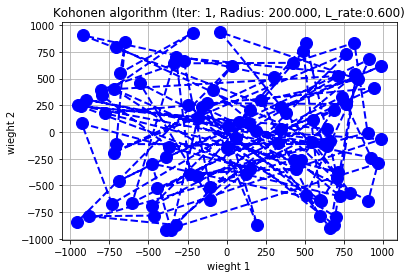

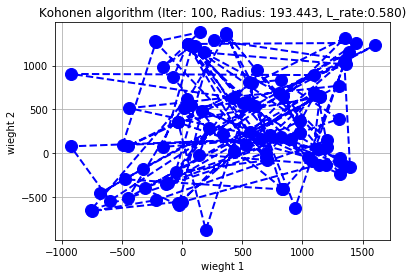

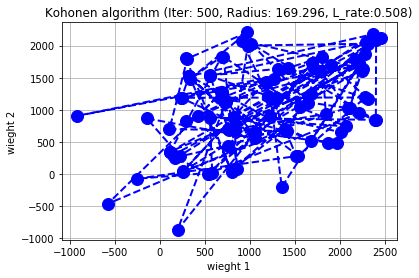

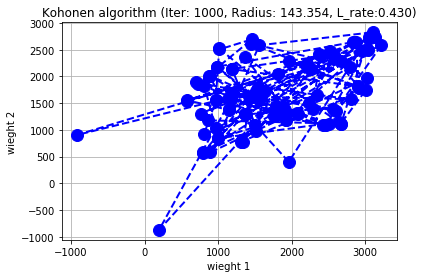

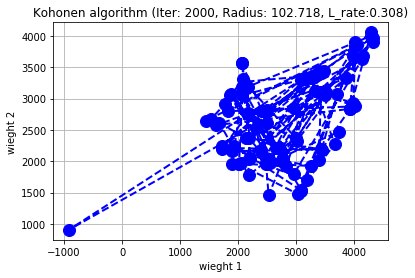

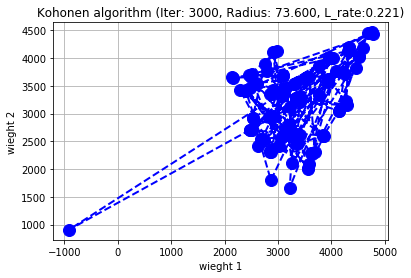

In [212]:
x = np.random.uniform(-1000,1000,100)
y = np.random.uniform(-1000,1000,100)
step_max = 3000
radius = 200
alpha = 0.6
draw(x, y, 1, radius, alpha)
train(x, y, step_max, radius, alpha)

## Second sample
* Range: -100 < x,y <100
* Max iteretion: 1000
* Initial neighbour distance: 20
* Initial learning rate: 0.7

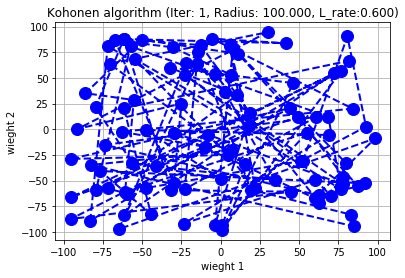

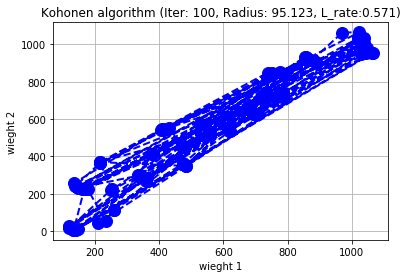

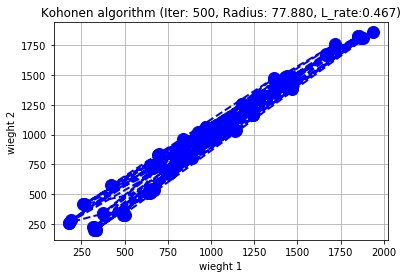

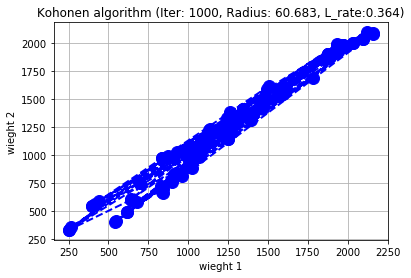

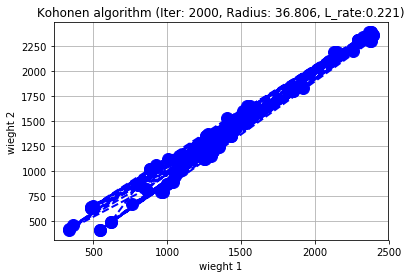

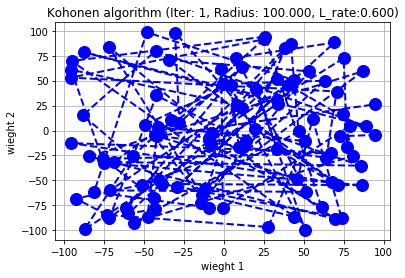

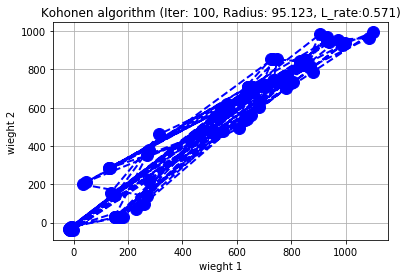

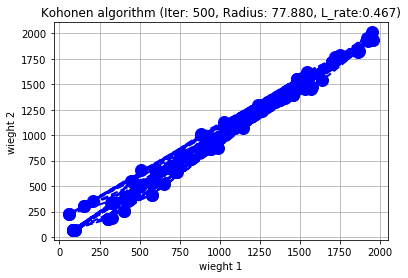

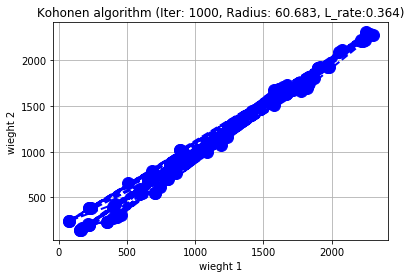

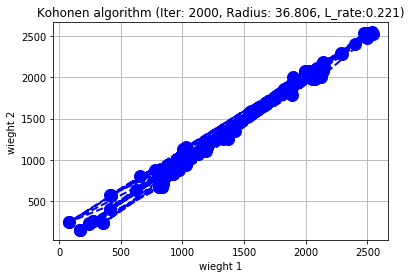

In [213]:
x = np.random.uniform(-100,100,100)
y = np.random.uniform(-100,100,100)
step_max = 2000
radius = 100
alpha = 0.6
draw(x, y, 1, radius, alpha)
train(x, y, step_max, radius, alpha)

In [0]:
def generate_circle_point(s_range, e_range, amount=100):
  ang = np.random.uniform(0, 2*np.pi, amount)
  r = np.random.uniform(s_range, e_range, amount)
  y = r * np.sin(ang)
  x = r * np.cos(ang)
  return x, y

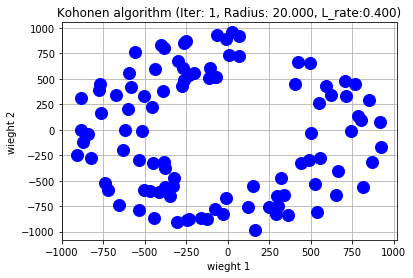

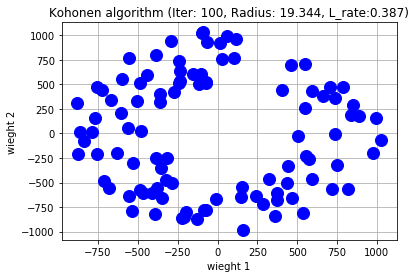

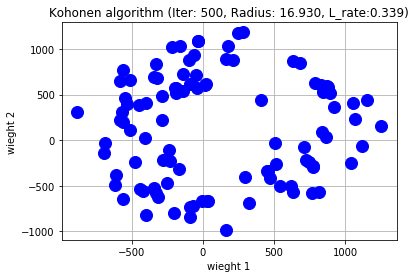

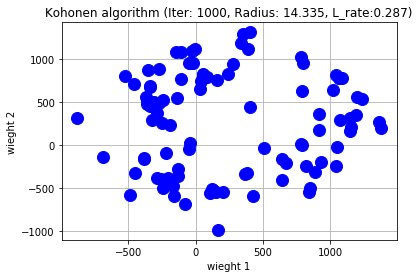

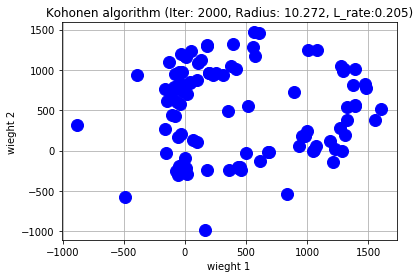

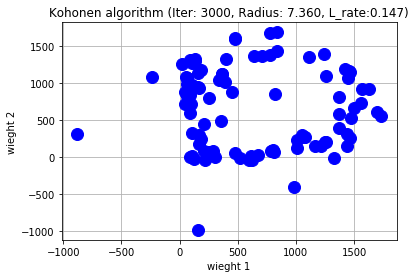

In [223]:
x, y = generate_circle_point(500, 1000) 
step_max = 3000
radius = 20
alpha = 0.4
draw(x, y, 1, radius, alpha, False)
train(x, y, step_max, radius, alpha, is_line=False)